In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
##Read Data
telecom=pd.read_csv(r'F:\Upgrad\ML2\telecom cs\telecom_churn_data.csv',encoding='ISO-8859-1')

In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

In [5]:

telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
telecom.shape

(99999, 226)

In [8]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [9]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [10]:
##check for null value percentage
round((telecom.isnull().sum()*100)/len(telecom),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
#telecom=telecom.dropna(how='all')

In [12]:
##lets look at date columns and convert them to datetime format
object_columns = telecom.select_dtypes(include=['object']).columns 
object_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [13]:
for obj in object_columns:
    telecom[obj]=pd.to_datetime(telecom[obj],format='%m/%d/%Y')

In [14]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

In [15]:
max(telecom['last_date_of_month_6'])

Timestamp('2014-06-30 00:00:00')

In [16]:
telecom['last_date_of_month_6'].value_counts()

2014-06-30    99999
Name: last_date_of_month_6, dtype: int64

In [17]:
telecom['last_date_of_month_7'].value_counts()

2014-07-31    99398
Name: last_date_of_month_7, dtype: int64

In [18]:
telecom['last_date_of_month_8'].value_counts()

2014-08-31    98899
Name: last_date_of_month_8, dtype: int64

In [19]:
telecom['last_date_of_month_9'].value_counts()

2014-09-30    98340
Name: last_date_of_month_9, dtype: int64

In [20]:
telecom['date_of_last_rech_6'].value_counts(ascending=False)

2014-06-30    16960
2014-06-29    12918
2014-06-27    11169
2014-06-28     9491
2014-06-26     5530
2014-06-25     4896
2014-06-17     4145
2014-06-24     4129
2014-06-14     3845
2014-06-21     3747
2014-06-23     2908
2014-06-18     2747
2014-06-12     2511
2014-06-22     2344
2014-06-13     2147
2014-06-19     2009
2014-06-20     1803
2014-06-16     1126
2014-06-15      873
2014-06-11      579
2014-06-08      520
2014-06-05      327
2014-06-07      322
2014-06-10      283
2014-06-03      233
2014-06-01      218
2014-06-09      199
2014-06-06      173
2014-06-04      131
2014-06-02      109
Name: date_of_last_rech_6, dtype: int64

In [21]:
#telecom['date_of_last_rech_6'].value_counts(ascending=False)

In [22]:
##Days since Recharge
#The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
telecom['days_since_rech_6']=telecom['last_date_of_month_6']-telecom['date_of_last_rech_6']

In [23]:
telecom['days_since_rech_7']=telecom['last_date_of_month_7']-telecom['date_of_last_rech_7']
telecom['days_since_rech_8']=telecom['last_date_of_month_8']-telecom['date_of_last_rech_8']
#telecom['days_since_rech_9']=telecom['last_date_of_month_9']-telecom['date_of_last_rech_9']

In [24]:
##lets drop orginal columns
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)

In [25]:
telecom.shape

(99999, 223)

In [26]:
#telecom['date_of_last_rech_6'].head()

In [27]:
import datetime as dt
telecom['days_since_rech_6']=telecom['days_since_rech_6'].dt.days
telecom['days_since_rech_7']=telecom['days_since_rech_7'].dt.days
telecom['days_since_rech_8']=telecom['days_since_rech_8'].dt.days

In [28]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_since_rech_6,days_since_rech_7,days_since_rech_8
0,7000842753,109,0.0,0.0,0.0,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,

In [29]:
##check for null value percentage
round((telecom.isnull().sum()*100)/len(telecom),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou

In [30]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 223 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_9      datetime64[ns]
 6   arpu_6                    float64       
 7   arpu_7                    float64       
 8   arpu_8                    float64       
 9   arpu_9                    float64       
 10  onnet_mou_6               float64       
 11  onnet_mou_7               float64       
 12  onnet_mou_8               float64       
 13  onnet_mou_9               float64       
 14  offnet_mou_6              float64       
 15  offnet_mou_7              float64       
 16  offnet_mou_8              float64       
 17  offnet_mou_

## Filter High Value Customers

In [31]:
#caluclate total data recharge amount for june and july
telecom['total_data_rech_6']=telecom['total_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_data_rech_7']=telecom['total_rech_data_7']*telecom['av_rech_amt_data_7']

In [32]:
##adding total data recharge and total recharge to get recharge amount
telecom['rech_amt_6']=(telecom['total_rech_amt_6'].fillna(0)+ telecom['total_data_rech_6'].fillna(0))
telecom['rech_amt_7']=(telecom['total_rech_amt_7'].fillna(0)+ telecom['total_data_rech_7'].fillna(0))

In [33]:
telecom['avg_rech_amt_6_7']=(telecom['rech_amt_6']+telecom['rech_amt_7'])/2

In [34]:
x = np.percentile(telecom['avg_rech_amt_6_7'],70.0)
x

478.0

In [35]:
##high value customers
telecom_filter=telecom[telecom['avg_rech_amt_6_7']>=x]

In [36]:
#After filtering high value customers,we create churn column based on usage and call data of 9th month
#using attributes:total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
churncolumns = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
telecom_filter['churn'] = np.where(telecom_filter[churncolumns].sum(axis=1) == 0, 1, 0 )

In [37]:
telecom_filter['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [38]:
telecom_filter.shape

(30001, 229)

In [39]:
#After creating churn table from september data,we remove churn attributes
##drop all 9 month columns
nine_month_col=[col for col in telecom_filter.columns if '_9' in col]
telecom_filter.drop(columns=nine_month_col,axis=1,inplace=True)

In [40]:
telecom_filter.shape

(30001, 175)

In [41]:
telecom_filter.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 175 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   arpu_6                    float64       
 6   arpu_7                    float64       
 7   arpu_8                    float64       
 8   onnet_mou_6               float64       
 9   onnet_mou_7               float64       
 10  onnet_mou_8               float64       
 11  offnet_mou_6              float64       
 12  offnet_mou_7              float64       
 13  offnet_mou_8              float64       
 14  roam_ic_mou_6             float64       
 15  roam_ic_mou_7             float64       
 16  roam_ic_mou_8             float64       
 17  roam_og_mou

In [42]:
###lets drop original columsn from which we have derived new features
telecom_filter.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8','total_rech_data_6','total_rech_data_7','total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [43]:
##check for null value percentage
round((telecom_filter.isnull().sum()*100)/len(telecom_filter),2)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.75
std_og_t2o_mou         0.75
loc_ic_t2o_mou         0.75
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
offnet_mou_6           1.82
offnet_mou_7           1.79
offnet_mou_8           3.91
roam_ic_mou_6          1.82
roam_ic_mou_7          1.79
roam_ic_mou_8          3.91
roam_og_mou_6          1.82
roam_og_mou_7          1.79
roam_og_mou_8          3.91
loc_og_t2t_mou_6       1.82
loc_og_t2t_mou_7       1.79
loc_og_t2t_mou_8       3.91
loc_og_t2m_mou_6       1.82
loc_og_t2m_mou_7       1.79
loc_og_t2m_mou_8       3.91
loc_og_t2f_mou_6       1.82
loc_og_t2f_mou_7       1.79
loc_og_t2f_mou_8       3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
std_og_t2t_mou_6    

In [44]:
##removing columns having 40% missing values
telecom_filter.drop(['total_rech_data_8'     
,'max_rech_data_6'       
,'max_rech_data_7'     
,'max_rech_data_8'       
,'count_rech_2g_6'      
,'count_rech_2g_7'       
,'count_rech_2g_8'      
,'count_rech_3g_6'       
,'count_rech_3g_7'       
,'count_rech_3g_8'       
,'av_rech_amt_data_6'    
,'av_rech_amt_data_7'    
,'av_rech_amt_data_8','arpu_3g_6'            
,'arpu_3g_7'             
,'arpu_3g_8'             
,'arpu_2g_6'             
,'arpu_2g_7'             
,'arpu_2g_8'             
,'night_pck_user_6'      
,'night_pck_user_7'      
,'night_pck_user_8'      
,'fb_user_6'             
,'fb_user_7'             
,'fb_user_8'             
,'total_data_rech_6'     
,'total_data_rech_7'],axis=1,inplace=True)

In [45]:
telecom_filter.shape

(30001, 141)

In [46]:
##lets look at datatypes

In [47]:
##catgeorical
#3no categorical features
telecom_cat=telecom_filter.select_dtypes(include=['category']).columns
telecom_cat

Index([], dtype='object')

In [48]:
##numericcal features
telecom_num=telecom_filter.select_dtypes(include=['number']).columns
telecom_num.shape

(141,)

In [49]:
####datetime features
telecom_date=telecom_filter.select_dtypes(include=['datetime']).columns
telecom_date

Index([], dtype='object')

- we have only numeric attribute null values

In [50]:
telecom_filter.shape

(30001, 141)

In [51]:
##check for null value percentage
columns=round((telecom_filter.isnull().sum()*100)/len(telecom_filter),2)
columns.shape

(141,)

In [52]:
null_col=columns[columns!=0]
null_col.shape
null_col

loc_og_t2o_mou       0.75
std_og_t2o_mou       0.75
loc_ic_t2o_mou       0.75
onnet_mou_6          1.82
onnet_mou_7          1.79
onnet_mou_8          3.91
offnet_mou_6         1.82
offnet_mou_7         1.79
offnet_mou_8         3.91
roam_ic_mou_6        1.82
roam_ic_mou_7        1.79
roam_ic_mou_8        3.91
roam_og_mou_6        1.82
roam_og_mou_7        1.79
roam_og_mou_8        3.91
loc_og_t2t_mou_6     1.82
loc_og_t2t_mou_7     1.79
loc_og_t2t_mou_8     3.91
loc_og_t2m_mou_6     1.82
loc_og_t2m_mou_7     1.79
loc_og_t2m_mou_8     3.91
loc_og_t2f_mou_6     1.82
loc_og_t2f_mou_7     1.79
loc_og_t2f_mou_8     3.91
loc_og_t2c_mou_6     1.82
loc_og_t2c_mou_7     1.79
loc_og_t2c_mou_8     3.91
loc_og_mou_6         1.82
loc_og_mou_7         1.79
loc_og_mou_8         3.91
std_og_t2t_mou_6     1.82
std_og_t2t_mou_7     1.79
std_og_t2t_mou_8     3.91
std_og_t2m_mou_6     1.82
std_og_t2m_mou_7     1.79
std_og_t2m_mou_8     3.91
std_og_t2f_mou_6     1.82
std_og_t2f_mou_7     1.79
std_og_t2f_m

In [53]:
#dropping null rows
telecom_filter=telecom_filter.dropna()

In [54]:
telecom_filter.shape

(28163, 141)

In [55]:
#3check null value %
round((telecom_filter.isnull().sum()*100)/len(telecom_filter),2)


mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_m

In [56]:
##churn percentage
100*(telecom_filter['churn'].sum())/telecom_filter.shape[0]

5.461065937577673

In [57]:
churn=telecom_filter[telecom_filter['churn']==1]
churn.shape

(1538, 141)

In [58]:
not_churn=telecom_filter[telecom_filter['churn']==0]
not_churn.shape

(26625, 141)

In [59]:
telecom_filter.churn.value_counts(ascending=False)

0    26625
1     1538
Name: churn, dtype: int64

- We Have Imbalanced DataSet

## Visualization

## Univariate analysis

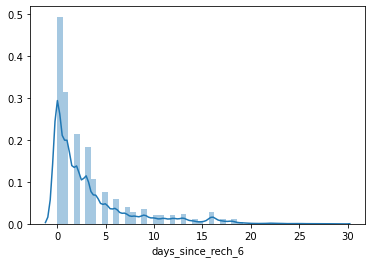

In [60]:
sns.distplot(telecom_filter['days_since_rech_6'])

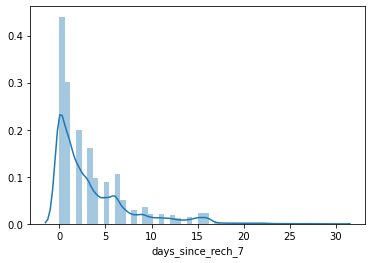

In [61]:
sns.distplot(telecom_filter['days_since_rech_7'])

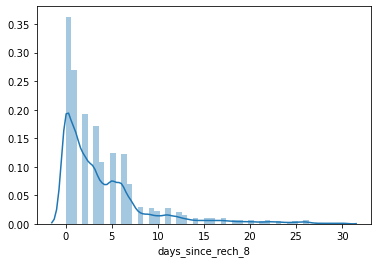

In [62]:
sns.distplot(telecom_filter['days_since_rech_8'])

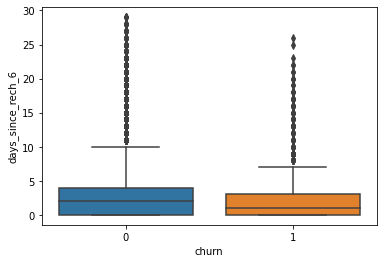

In [63]:
sns.boxplot(telecom_filter['churn'],telecom_filter['days_since_rech_6'])

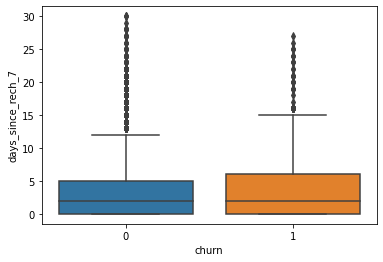

In [64]:
sns.boxplot(telecom_filter['churn'],telecom_filter['days_since_rech_7'])

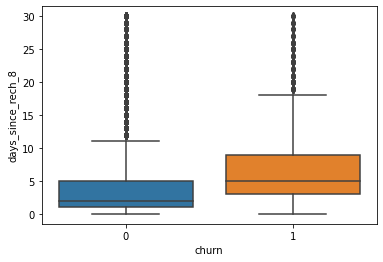

In [65]:
sns.boxplot(telecom_filter['churn'],telecom_filter['days_since_rech_8'])

In [66]:
telecom_filter.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'days_since_rech_6',
       'days_since_rech_7', 'days_since_rech_8', 'rech_amt_6', 'rech_amt_7',
       'avg_rech_amt_6_7', 'churn'],
      dtype='object', length=141)

## Train,Test Split

In [67]:
telecom_filter_df=telecom_filter.drop('mobile_number',axis=1)

In [68]:
y=telecom_filter_df.pop('churn')

In [69]:
X=telecom_filter_df

In [70]:
X.shape,y.shape

((28163, 139), (28163,))

In [71]:
y[y==0].shape,y[y==1].shape,y.value_counts()

((26625,),
 (1538,),
 0    26625
 1     1538
 Name: churn, dtype: int64)

In [72]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Great' is not recognized as an internal or external command,
operable program or batch file.


In [73]:
#from imblearn.combine import SMOTETomek

In [74]:
##implementing over sampling for handling imbalance
#smk=SMOTETomek(random_state=42)
#X_res,y_res=smk.fit_sample(X,y)

In [75]:
#X_res.shape,y_res.shape

In [76]:
#y_res[y_res==0].shape,y_res[y_res==1].shape

In [77]:
#y_res.value_counts()

- we got balanced dataset

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [80]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,y_train.shape,y_test.shape

((19714, 139), (8449, 139), (19714,), (8449,), (19714,), (8449,))

In [81]:
y_train.value_counts()

0    18610
1     1104
Name: churn, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE
#implementing over sampling for handling imbalance
smk=SMOTE(random_state=42)
X_train_res,y_train_res=smk.fit_sample(X_train,y_train)

In [83]:
X_train_res.shape,y_train_res.shape

((37220, 139), (37220,))

In [84]:
y_train_res.value_counts()

1    18610
0    18610
Name: churn, dtype: int64

In [85]:
X_train_res.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,days_since_rech_6,days_since_rech_7,days_since_rech_8,rech_amt_6,rech_amt_7,avg_rech_amt_6_7
0,109,0.0,0.0,0.0,501.577,784.415,719.323,198.79,142.29,205.59,923.44,1359.18,1191.29,0.00,0.00,3.13,0.00,0.00,29.54,16.31,17.11,6.98,31.01,72.18,58.16,0.00,0.00,0.00,0.00,0.00,0.00,47.33,89.29,65.14,182.48,125.18,196.94,892.43,1286.99,1097.48,0.0,0.0,0.0,0.0,0.0,0.0,1074.91,1412.18,1294.43,0.00,0.00,0.00,1.66,6.21,13.73,1.00,0.0,0.0,1124.91,1507.69,1373.31,7.69,2.59,12.34,18.16,35.88,39.16,0.00,0.00,0.00,25.86,38.48,51.51,2.43,4.33,0.00,5.69,35.18,11.21,0.0,0.00,0.0,0.0,0.0,0.0,8.13,39.51,11.21,33.99,77.99,62.73,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14,15,16,824,110,200,144,30,130,30,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,229,0.00,0.00,0.00,0.00,2.0,2.0,5.0,480.0,926.0,703.0
1,109,0.0,0.0,0.0,643.005,753.373,868.198,1102.28,1182.08,935.54,233.88,345.39,445.91,0.00,0.00,0.00,0.00,0.00,0.00,0.35,6.76,31.19,23.28,86.03,100.94,0.00,0.00,0.00,1.43,0.44,0.00,23.63,92.79,132.14,1101.93,1175.31,904.34,210.59,259.36,334.26,0.0,0.0,0.0,0.0,0.0,0.0,1312.53,1434.68,1238.61,0.00,0.00,3.18,1.43,1.04,7.51,0.00,0.0,0.0,1337.59,1528.53,1381.46,0.88,15.73,25.76,31.43,46.96,79.08,0.00,0.00,0.00,32.31,62.69,104.84,0.00,0.73,0.00,13.49,6.63,69.73,0.0,0.00,0.0,0.0,0.0,0.0,13.49,7.36,69.73,45.81,70.06,174.58,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20,28,29,1004,110,50,130,36,30,30,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,688,0.00,0.00,0.00,0.00,2.0,0.0,1.0,728.0,836.0,782.0
2,109,0.0,0.0,0.0,586.154,322.740,419.290,11.91,6.88,37.39,48.54,49.78,75.99,0.00,0.00,0.00,0.00,0.00,0.00,11.91,6.88,37.39,18.94,8.06,45.56,7.93,2.01,26.53,0.00,0.00,0.00,38.79,16.96,109.49,0.00,0.00,0.00,14.73,39.69,3.90,0.0,0.0,0.0,0.0,0.0,0.0,14.73,39.69,3.90,6.93,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,60.46,56.66,113.39,11.54,21.01,21.89,80.99,80.93,173.79,37.21,42.79,91.29,129.76,144.74,286.99,0.00,0.00,1.83,60.46,26.63,7.44,0.0,0.00,0.0,0.0,0.0,0.0,60.46,26.63,9.28,190.84,171.38,296.28,0.00,0.0,0.00,0.00,0.00,0.00,0.61,0.00,0.00,4,4,1,154,252,619,154,252,619,154,90.8

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()

In [88]:
X_train=scaler.fit_transform(X_train_res)

In [89]:
X_test=scaler.transform(X_test)

In [90]:
X_train.shape,X_test.shape

((37220, 139), (8449, 139))

In [91]:
y_train_res[y_train_res==0].shape,y_train_res[y_train_res==1].shape,y_test[y_test==0].shape,y_test[y_test==1].shape

((18610,), (18610,), (8015,), (434,))

## PCA

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca=PCA(random_state=42)

In [94]:
pca.fit(X_train)

PCA(random_state=42)

In [95]:
##components
pca.components_

array([[-5.34080119e-20,  1.52655666e-16, -1.11022302e-16, ...,
         4.07158526e-02,  4.74751333e-02,  5.17264016e-02],
       [ 5.78133719e-19, -2.22044605e-16,  1.11022302e-16, ...,
        -1.32600172e-02, -1.59708496e-02, -1.71655060e-02],
       [ 7.44462628e-20, -6.93889390e-17,  7.71951947e-17, ...,
         1.77681499e-01,  1.92419413e-01,  2.16471383e-01],
       ...,
       [ 1.00000000e+00, -4.27337455e-24, -3.97561886e-23, ...,
         5.31266651e-20, -1.45853294e-19, -6.28613263e-20],
       [ 0.00000000e+00,  4.00172767e-02, -2.07920044e-01, ...,
         5.28405200e-03,  6.15150664e-03, -9.80521096e-03],
       [ 0.00000000e+00,  8.66980800e-02,  8.13795296e-01, ...,
         8.50299628e-03,  9.89888784e-03, -1.57783596e-02]])

In [96]:
pca.explained_variance_ratio_

array([1.03670988e-01, 8.40198116e-02, 5.62126322e-02, 4.50259482e-02,
       4.22033182e-02, 3.56996700e-02, 3.20045301e-02, 2.94481557e-02,
       2.79460691e-02, 2.65027499e-02, 2.45991219e-02, 2.16901626e-02,
       2.02760382e-02, 1.98383446e-02, 1.95029262e-02, 1.85162092e-02,
       1.64085250e-02, 1.57648393e-02, 1.42250208e-02, 1.37311255e-02,
       1.36025367e-02, 1.27893518e-02, 1.21417776e-02, 1.07517889e-02,
       1.01046896e-02, 9.27422093e-03, 9.03105699e-03, 8.82912328e-03,
       8.53717664e-03, 7.87055717e-03, 7.50645993e-03, 7.49896891e-03,
       7.26826295e-03, 7.08508306e-03, 6.92774146e-03, 6.79871655e-03,
       6.60250092e-03, 6.43594913e-03, 6.36234629e-03, 6.21509244e-03,
       6.07255537e-03, 5.62514105e-03, 5.57984579e-03, 5.42171043e-03,
       5.19258748e-03, 5.05362685e-03, 4.87230548e-03, 4.60498229e-03,
       4.47058605e-03, 4.41083823e-03, 4.37243907e-03, 4.24910657e-03,
       3.92870249e-03, 3.84452178e-03, 3.66195738e-03, 3.57642760e-03,
      

In [97]:
cum_sum=np.cumsum(pca.explained_variance_ratio_)

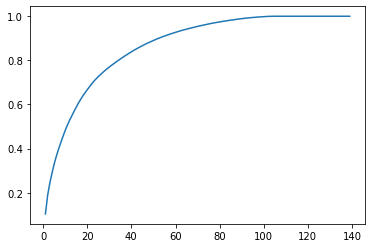

In [98]:
##check fot optimal pc's
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),cum_sum)

In [99]:
from sklearn.decomposition import IncrementalPCA

In [100]:
##pca with 70 componenets
pca_final=IncrementalPCA(n_components=70)
X_train_pca=pca_final.fit_transform(X_train)

In [101]:
X_train_pca.shape

(37220, 70)

In [102]:
X_train_pca=pd.DataFrame(X_train_pca)

In [103]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-0.501249,4.397304,0.378859,-0.283238,-0.214678,-2.696352,-1.784016,0.542945,2.268485,0.139696,0.198513,-0.428191,0.231727,-0.175340,0.470188,1.001320,0.336216,0.073011,-0.314804,0.500265,0.420839,-0.051168,-0.236723,-0.046272,-0.022249,-0.355950,0.881411,-0.047456,0.187434,0.286253,-0.284853,0.086092,-0.168510,0.343090,-0.256433,-0.405295,-0.193935,-0.842339,0.024024,0.348951,-0.012739,-0.272965,0.262194,0.278572,-0.491392,-0.142737,0.426936,-0.175381,0.023167,0.057051,-0.062355,0.094955,-0.169445,-0.208628,0.083410,-0.020244,-0.251641,-0.228690,0.096943,0.102778,0.254286,-0.153423,-0.177573,-0.327901,0.044060,-0.055146,0.019153,0.023617,-0.051132,0.066922
1,-0.143933,5.316365,0.025038,1.238069,-0.254411,2.127945,0.580408,0.850462,1.833461,0.680602,-0.625030,-0.997691,0.429875,-1.186847,0.147041,0.280261,-1.081944,0.317246,0.075864,-0.969239,-0.135186,0.319521,-0.017976,-0.683053,0.308396,0.348952,0.288531,-0.125061,0.103273,-0.431698,0.176543,-0.451357,0.104372,-0.034732,0.405018,-0.214200,-0.582339,0.290191,-0.137311,0.637736,-0.202096,-0.598894,-0.060190,-0.257126,-0.133313,-0.523681,0.042243,-0.200190,-0.067586,-0.018940,-0.012685,-0.159531,-0.024284,-0.078916,-0.155756,0.331574,0.383116,-0.045459,0.012043,0.154180,-0.134118,-0.058989,-0.073678,-0.038935,-0.169732,0.130322,-0.017424,-0.042150,-0.078076,0.104046
2,-0.133769,-3.890280,1.616901,-2.495995,-0.203146,1.192979,-1.732447,0.626988,1.232384,1.532398,-0.568692,-0.937355,-1.924902,1.012831,0.007473,-1.029087,2.247520,0.393353,0.262677,-0.322605,0.301679,-0.041480,0.269745,-0.436743,0.905712,0.013319,-0.452404,-0.530362,0.651502,-1.077800,-1.485189,0.155381,0.489702,-0.653168,-1.097453,0.435454,1.339295,0.627848,-0.672469,1.056505,2.111128,0.374649,-0.588287,1.034044,-0.894088,0.694180,2.208527,-0.817129,0.082006,0.922253,1.206949,-0.449254,0.498226,0.060017,0.549002,0.963064,-0.793150,0.274905,-0.285396,-1.054679,0.013374,1.609999,-0.722600,0.346408,0.034043,-0.482128,0.158651,-0.656516,-0.863596,-0.152404
3,-0.881231,-0.805685,0.020397,-2.338309,-0.078449,-0.342527,1.685407,-1.790216,-0.172955,-1.798995,-0.915421,0.522832,0.614496,-0.724526,0.136322,-0.072987,-0.637392,0.209996,-0.195989,0.023176,0.715274,0.174298,-0.226245,2.188428,0.473704,0.070199,-0.262969,0.093130,-2.207674,0.321555,-0.869147,0.982324,0.186134,0.237907,0.348463,0.454086,-0.098320,-0.922108,-1.746612,-0.799745,-1.450808,0.334150,0.225882,0.504307,-0.691698,-0.766333,0.357566,-0.924560,-1.047550,0.391215,1.126371,-0.280210,-0.399976,0.119422,-0.382885,-0.417123,-0.224765,0.044785,-0.026219,0.005070,0.091036,-0.220606,-0.171274,0.150298,0.180520,-0.130789,0.239624,0.342973,0.499785,0.220042
4,1.249115,-2.048755,-0.276639,0.063732,-1.658011,0.013561,-0.630812,0.581435,0.739495,-0.115596,1.541021,0.309508,-1.403237,0.888630,0.621290,-1.219281,-1.620617,-0.204689,0.332741,-0.026690,0.751917,-0.966605,0.424640,-0.226850,0.926400,1.057989,0.124978,-0.281623,0.487640,0.316171,-0.203055,0.232836,-0.172103,-0.317791,-0.030615,0.028530,0.816212,-0.960855,0.400078,-0.253083,-0.790766,-0.504330,0.311056,-0.065015,-0.306086,0.201376,-0.228310,-0.117798,-0.806841,-0.821457,-0.432069,-0.403209,-1.955412,-0.050309,0.521129,0.592255,0.334032,-0.206380,0.174360,-0.595872,0.262275,0.113447,-0.317550,-0.130181,0.402504,-0.111832,0.387653,0.857720,1.047334,0.234615


In [104]:
#pca_var=PCA(0.9)
#X_train_pca_var=pca_var.fit_transform(X_train)
#X_train_pca_var.shape

In [105]:
###corealtion 
#plt.figure(figsize=(15,10))
#sns.heatmap(X_train_pca.corr(),annot=True,cmap="YlGnBu")

In [106]:
## applying transformation on test
X_test_pca=pca_final.transform(X_test)
X_test_pca.shape

(8449, 70)

## Model Building 

## Logistic Regression using pc's

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_mod=LogisticRegression(class_weight='balanced')

In [109]:
log_model_pca=log_mod.fit(X_train_pca,y_train_res)

In [110]:
##make Predictions
y_train_pred=log_model_pca.predict(X_train_pca)
y_test_pred=log_model_pca.predict(X_test_pca)

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion1=confusion_matrix(y_test,y_test_pred)
confusion1

array([[6695, 1320],
       [  99,  335]], dtype=int64)

In [113]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.8320511303112794

In [114]:
##train_accuracy
metrics.accuracy_score(y_train_res,y_train_pred)

0.8543793659322945

In [115]:
##test_accuracy
metrics.roc_auc_score(y_test,y_test_pred)

0.8035990984645726

In [116]:
metrics.roc_auc_score(y_train_res,y_train_pred)

0.8543793659322945

In [117]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.771889400921659

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.835308796007486

In [120]:
##feature_imporatnce
pd.DataFrame(log_model_pca.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,-0.422897,0.385694,-0.075757,-0.327448,-0.101577,-0.109283,0.185308,-0.346055,-0.743505,0.010551,0.083193,0.069125,0.083914,-0.193076,-0.151903,0.142858,0.227156,-0.101408,0.188382,0.243074,-0.179124,-0.667686,0.23015,0.645178,-0.293712,-0.190743,0.561308,-0.520928,-0.034504,0.131072,-0.303853,-0.370481,-0.00945,0.425957,0.230851,-0.494502,-0.290955,-0.090319,-0.131004,-0.094367,0.18588,0.004453,-0.140549,-0.067886,0.139496,-0.28286,-0.103579,0.153968,0.088939,0.142807,0.064336,0.090552,0.183466,-0.303079,0.150527,-0.024875,0.434485,-0.226445,0.612512,0.406795,0.192697,-0.314807,0.089648,0.409004,-0.17228,-0.068043,-0.315484,-0.339046,0.226703,-0.066088


In [121]:
###lets build another models
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(max_depth=5,random_state=42)

In [122]:
decision_tree.fit(X_train_pca,y_train_res)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [123]:
##predictions
y_train_pred=decision_tree.predict(X_train_pca)
y_test_pred=decision_tree.predict(X_test_pca)

In [124]:
metrics.accuracy_score(y_train_res,y_train_pred)

0.7978237506716819

In [125]:
metrics.accuracy_score(y_test,y_test_pred)

0.7893241803763759

In [126]:
#from sklearn.tree import plot_tree
#plt.figure(figsize=(50,30))

#plot_tree(decision_tree,filled=True)

## Hyper Parameter Tuning 

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
dt=DecisionTreeClassifier(random_state=42)
params={'max_depth': [3,5,7,9,12],'min_samples_leaf': [10,25,30,60,90],'criterion': ["gini", "entropy"]}
cv_model=GridSearchCV(estimator=dt,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')

In [129]:
cv_model.fit(X_train_pca,y_train_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_leaf': [10, 25, 30, 60, 90]},
             scoring='accuracy', verbose=1)

In [130]:
score=pd.DataFrame(cv_model.cv_results_)
score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.140497,0.174247,0.011236,0.002808,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.71158,0.720446,0.722864,0.727163,0.717759,0.719962,0.005208,42
1,1.699815,0.107687,0.017092,0.006798,gini,3,25,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.71158,0.720446,0.722864,0.727163,0.717759,0.719962,0.005208,42
2,1.599790,0.043467,0.011690,0.003218,gini,3,30,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.71158,0.720446,0.722864,0.727163,0.717759,0.719962,0.005208,42
3,1.581733,0.049120,0.010598,0.001843,gini,3,60,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.71158,0.720446,0.722864,0.727163,0.717759,0.719962,0.005208,42
4,1.731986,0.058400,0.020781,0.014233,gini,3,90,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.71158,0.721655,0.722864,0.727163,0.717759,0.720204,0.005253,41


In [131]:
dt_model=cv_model.best_params_
dt_model

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 10}

In [134]:
dt_model=DecisionTreeClassifier(max_depth=12,min_samples_leaf=10,criterion='gini',random_state=42)
dt_model.fit(X_train_pca,y_train_res)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, random_state=42)

In [135]:
y_train_pred=dt_model.predict(X_train_pca)

In [136]:
y_test_pred=dt_model.predict(X_test_pca)


In [137]:
##predictions on train
metrics.accuracy_score(y_train_res,y_train_pred)

0.9195056421278882

In [138]:
##predictions on test
metrics.accuracy_score(y_test,y_test_pred)

0.8237661261687774

In [139]:
metrics.roc_auc_score(y_test,y_test_pred)

0.7120570301652144

In [140]:
##predictions on train
metrics.roc_auc_score(y_train_res,y_train_pred)

0.9195056421278882

In [141]:
confusion2=confusion_matrix(y_test,y_test_pred)
confusion2

array([[6705, 1310],
       [ 179,  255]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5875576036866359

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.8365564566437929

In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8015
           1       0.16      0.59      0.26       434

    accuracy                           0.82      8449
   macro avg       0.57      0.71      0.58      8449
weighted avg       0.93      0.82      0.87      8449



## Random Forest Classifer

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)

In [149]:
rf.fit(X_train_pca,y_train_res)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=42)

In [150]:
rf.oob_score_

0.7596184846856529

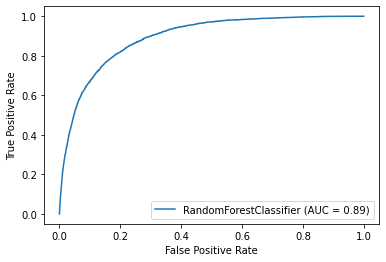

In [151]:
#plotting roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, X_train_pca, y_train_res)
plt.show()

## Hyper Parameter Tuning

In [191]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [192]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [193]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [194]:
grid_search.fit(X_train_pca,y_train_res)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 18.7min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [195]:
grid_search.best_score_

0.9491671144545943

In [196]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}

In [197]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [198]:
rf = RandomForestClassifier(random_state=42,max_depth=20, min_samples_leaf=5,n_estimators=100,n_jobs=-1)

In [199]:
rf.fit(X_train_pca,y_train_res)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [200]:
##predictions on train
y_train_pred=rf.predict(X_train_pca)

In [201]:
metrics.accuracy_score(y_train_res,y_train_pred)

0.9845781837721655

In [203]:
##predictions on test
y_test_pred=rf.predict(X_test_pca)

In [204]:
metrics.accuracy_score(y_test,y_test_pred)

0.9240146762930525

In [205]:
confusion3=confusion_matrix(y_test,y_test_pred)

In [206]:
confusion3

array([[7573,  442],
       [ 200,  234]], dtype=int64)

In [207]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5391705069124424

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.944853399875234

## AdaboostClassifier

In [212]:
from sklearn.ensemble import AdaBoostClassifier

In [213]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [214]:
abc=AdaBoostClassifier(n_estimators=100,base_estimator=shallow_tree,random_state=42)

In [215]:
abc.fit(X_train_pca,y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   n_estimators=100, random_state=42)

In [216]:
y_train_pred=abc.predict(X_train_pca)

In [217]:
metrics.accuracy_score(y_train_res,y_train_pred)

0.912439548629769

In [218]:
metrics.roc_auc_score(y_train_res,y_train_pred)

0.912439548629769

In [219]:
y_test_pred=abc.predict(X_test_pca)

In [220]:
metrics.accuracy_score(y_test,y_test_pred)

0.8717007929932536

In [221]:
confusion3=confusion_matrix(y_test,y_test_pred)

In [222]:
confusion3

array([[7098,  917],
       [ 167,  267]], dtype=int64)

In [223]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [224]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6152073732718893

In [225]:
# Let us calculate specificity
TN / float(TN+FP)

0.885589519650655

## Hyper parameter tuning

In [226]:
abc2=AdaBoostClassifier(base_estimator=shallow_tree,random_state=42)
params={'n_estimators':[30,60,90,150,200]}
grid_cv=GridSearchCV(estimator=abc2,param_grid=params,n_jobs=-1,cv=4,verbose=1,scoring='accuracy')
grid_cv.fit(X_train_pca,y_train_res)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.7min finished


GridSearchCV(cv=4,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                random_state=100),
                                          random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [30, 60, 90, 150, 200]},
             scoring='accuracy', verbose=1)

In [227]:
grid_cv.best_params_

{'n_estimators': 200}

In [ ]:
##AdaBoostClassifier  with optimal hyper parameters

In [228]:
abc3=AdaBoostClassifier(base_estimator=shallow_tree,n_estimators=200,random_state=42)
abc3.fit(X_train_pca,y_train_res)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   n_estimators=200, random_state=42)

In [229]:
y_train_pred=abc3.predict(X_train_pca)

In [230]:
metrics.accuracy_score(y_train_res,y_train_pred)

0.9409457281031703

In [231]:
y_test_pred=abc3.predict(X_test_pca)

In [232]:
metrics.accuracy_score(y_test,y_test_pred)

0.8881524440762221

In [233]:
confusion4=confusion_matrix(y_test,y_test_pred)

In [234]:
confusion4

array([[7251,  764],
       [ 181,  253]], dtype=int64)

In [235]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [236]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5829493087557603

In [237]:
# Let us calculate specificity
TN / float(TN+FP)

0.904678727386151

In [238]:
from sklearn.ensemble import GradientBoostingClassifier

## Gradientboosting classifier

In [239]:
# Gradient Boosting 
gbm = GradientBoostingClassifier(n_estimators = 200, max_features = 0.7, learning_rate = 0.3, max_depth = 5, random_state = 0, verbose = 0)

#Fitting Model
gbm.fit(X_train_pca, y_train_res)

#pred
y_test_pred = gbm.predict(X_test_pca)


In [240]:
confusion5=metrics.confusion_matrix(y_test,y_test_pred)
confusion5

array([[7577,  438],
       [ 205,  229]], dtype=int64)

In [242]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [243]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5276497695852534

In [244]:
# Let us calculate specificity
TN / float(TN+FP)

0.9453524641297567

In [245]:
metrics.accuracy_score(y_test,y_test_pred)

0.9238963190910167

In [246]:
##XGbBOOST Classifier
import xgboost as xgb

In [247]:
xgclf=xgb.XGBClassifier(learning_rate=0.3,max_depth=6,min_child_weight=1,n_estimators=100)

In [248]:
xgclf.fit(X_train_pca,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [249]:
metrics.roc_auc_score(y_true=y_test,y_score=xgclf.predict_proba(X_test_pca)[:, 1])

0.8549956734348902

In [250]:
metrics.roc_auc_score(y_true=y_train_res,y_score=xgclf.predict_proba(X_train_pca)[:, 1])

0.9999908815844678

## Building Random forest to know important features

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)


In [181]:
model_rf=RandomForestClassifier(random_state=42,max_depth=30, min_samples_leaf=10,n_jobs=-1,n_estimators=200)

In [182]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [184]:
model_rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.91337852e-03, 9.63307008e-03, 2.61038216e-02, 9.31156632e-03,
       8.89390680e-03, 6.90618553e-03, 7.72083161e-03, 9.49357629e-03,
       8.08613199e-03, 3.60340702e-03, 1.14135117e-02, 3.58234070e-02,
       3.07405160e-03, 1.40262441e-02, 3.91828230e-02, 5.27986597e-03,
       6.45784710e-03, 9.94967438e-03, 5.47259745e-03, 7.09462676e-03,
       2.10092511e-02, 2.89422940e-03, 3.48457856e-03, 3.55191579e-03,
       1.51346475e-03, 2.14707601e-03, 1.79752208e-03, 5.30797661e-03,
       7.27655430e-03, 2.36609759e-02, 6.64949956e-03, 6.36000141e-03,
       3.41735183e-03, 9.31662206e-03, 8.84394237e-03, 6.17105099e-03,
       2.85960585e-04, 3.27617832e-04, 1.63866892e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.66103570e-03, 1.18500736e-02,
       9.08397288e-03, 8.85977851e-04, 6.15967941e-04, 6.61327626e-04,
       3.80727942e-03, 5.33256330e-03, 3.37988129e-03, 1.54357169e-03,
      

In [185]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model_rf.feature_importances_
})

In [187]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,Varname,Imp
90,total_ic_mou_8,0.060646
66,loc_ic_t2m_mou_8,0.045439
72,loc_ic_mou_8,0.039863
18,roam_og_mou_8,0.039183
15,roam_ic_mou_8,0.035823
135,days_since_rech_8,0.029767
60,total_og_mou_8,0.028944
63,loc_ic_t2t_mou_8,0.026755
6,arpu_8,0.026104
109,last_day_rch_amt_8,0.025982


## Conclusions from Random Forests

- total_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,roam_og_mou_8,roam_ic_mou_8 are most important predictor variables to predict churn

## Final Thoughts

- 1.cutomers with tenure less than 4 yrs are more likely to churn.
- 2.average Recharge Amount is a strong feature to predict churn.
- 3.Logistic Regression produced the best prediction results followed by Adaboostclassifier